In [ ]:
SWE 546 - Assignment 3
Student: Mustafa Atik <m

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv("iris.txt", sep=" ")
df = df.sample(frac=1)
df.sample(10)

,sl,sw,pl,pw,c
39,5.1,3.4,1.5,0.2,1
138,6.0,3.0,4.8,1.8,3
21,5.1,3.7,1.5,0.4,1
58,6.6,2.9,4.6,1.3,2
87,6.3,2.3,4.4,1.3,2
19,5.1,3.8,1.5,0.3,1
140,6.7,3.1,5.6,2.4,3
69,5.6,2.5,3.9,1.1,2
66,5.6,3.0,4.5,1.5,2
54,6.5,2.8,4.6,1.5,2


### Preparing training and test data
Since the df is shuffled, it is safe to use the end side of *df* as test data. The first 120 items will be used as training data, while the last 30 items will be the test data.

In [32]:
features = np.hstack([
        np.matrix(df.sl).T[:120], 
        np.matrix(df.sw).T[:120],
        np.matrix(df.pl).T[:120],
        np.matrix(df.pw).T[:120]])
classes = np.matrix(df.c).T[:120]

testData = np.hstack([
        np.matrix(df.sl).T[120:], 
        np.matrix(df.sw).T[120:],
        np.matrix(df.pl).T[120:],
        np.matrix(df.pw).T[120:],
        np.matrix(df.c).T[120:]])

In [33]:
class KNN(object):
    """
    k-nearest neighbor classifier
    """
    
    def __init__(self, features, classes):
        super(KNN, self).__init__()
        self.features = features
        self.classes = classes
    
    @staticmethod
    def elect(neighbors):
        neighbors = np.array(neighbors)
        classes, counts = np.unique(neighbors[:,1], return_counts=True)
        return classes[np.argmax(counts)]
    
    def classify(self, x, k=3):
        # calculating error for each row, end up with a 1xn errors matrix.
        errors = np.sum(np.power(self.features - x, 2), axis=1)

        neighbors = []
        
        # finding the nearest neighbours
        minInd = 0
        for i in range(k):
            for j in range(len(errors)):
                if errors[j] <= errors[minInd]:
                    minInd = j

            neighbors.append([
                    float(errors[minInd]), 
                    float(self.classes[minInd])])
            errors[minInd] = np.inf
        
        winnerClass = KNN.elect(neighbors)
        return winnerClass
    
    def getAccuracy(self, testData, k=3):
        corrects = 0
        colsNumber = testData.shape[1]
        classInd = colsNumber - 1

        for i in testData:
            actual =  float(i[:,classInd])
            predicted = self.classify(i[:,0:classInd], k)
            if actual == predicted:
                corrects += 1
        return float(corrects) / len(testData)

In [34]:
def test(features, classes, testData):
    knn = KNN(features, classes)
    accuracies = np.array([])
    krange = 8
    for i in range(1, krange):
        accuracy = knn.getAccuracy(testData, i)
        accuracies = np.append(accuracies, (i, accuracy))

    accuracies = np.reshape(accuracies, (krange - 1 , -1))
    plt.plot(accuracies[:,0], accuracies[:,1])
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.show()

def evaluate(features, classes, testData, k=3):
    knn = KNN(features, classes)
    accuracies = np.array([])
    
    a = {
        "fpositive": 0.0,
        "tpositive": 0.0,
        "fnegative": 0.0,
        "tnegative": 0.0
    }
    
    for i in range(len(classes)):
        actual = int(classes[i])
        predicted = knn.classify(features[i], k)
        if predicted == actual:
            a["tpositive"] += 1
        elif predicted == 1:
            a["fpositive"] += 1
        elif actual == 1:
            a["fnegative"] += 1
        else:
            a["tnegative"] += 1

    return a


In [35]:
def normalize(data):
    data = np.copy(data)
    colNumber = data.shape[1]
    for coln in range(colNumber):
        col = data[:,coln]
        cmean = np.mean(col)
        cmax = np.amax(col)
        cmin = np.amin(col)
        data[:,coln] = (data[:,coln] - cmin) / (cmax - cmin)
    return data

### Testing the classifier with all the features, without normalization

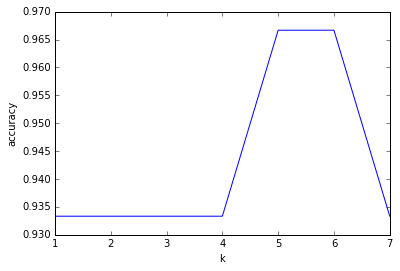

In [36]:
test(features, classes, testData)

### using only the normalized features sl and sw

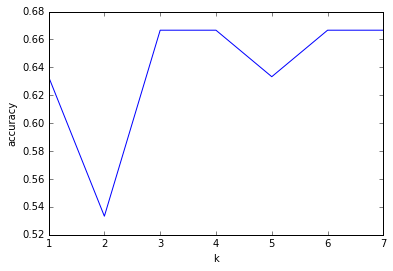

In [37]:
test(
    normalize(features[:,0:2]), # features
    classes,                    # classes
    np.hstack([normalize(testData[:,0:2]), testData[:,4]]) # test data
    )

### using only the normalized features pl and pw

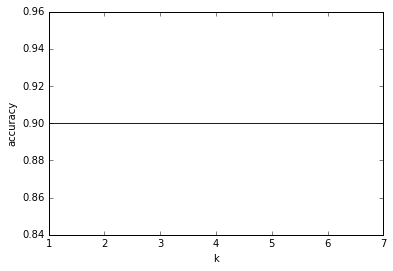

In [38]:
test(
    normalize(features[:,2:4]), # features
    classes,                    # classes
    np.hstack([normalize(testData[:,2:4]), testData[:,4]]) # test data
    )

### using only the unnormalized features pl and pw

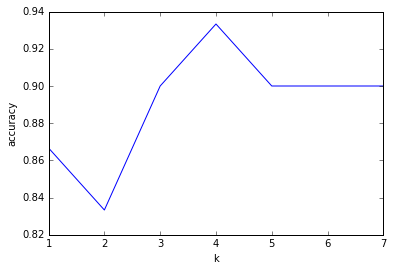

In [39]:
test(
    features[:,2:4], # features
    classes,                    # classes
    np.hstack([testData[:,2:4], testData[:,4]]) # test data
    )

### Recall and precision

- recall = TP / (TP + FN)
- precision = TP / (TP + FP)


In [40]:
a = evaluate(features, classes, testData, 5)
print "precision: ", a["tpositive"] / (a["tpositive"] + a["fpositive"])
print "recall: ", a["tpositive"] / (a["tpositive"] + a["fnegative"])

precision:  1.0
recall:  1.0
